In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm, trange
from random import randint

In [104]:
import multiprocessing as mp
print("Number of processors:", mp.cpu_count())

Number of processors: 4


In [2]:
df = pd.read_csv('FCI_ALL_prepost_enc_20180720.csv')

In [3]:
df.head()

,studentID,001,002,003,004,005,006,007,008,009,...,122,123,124,125,126,127,128,129,130,dataInfo
0,887ddee16ef50cdc961a76e99e829e200bb6574e096ac8...,3,4,2,1,5,1,1,5,4,...,2,2,1,4,4,3,4,4,5,MDouglas_ASU
1,40a1e2b3dee8d885634c50c1977381e194d75664b4d019...,5,4,1,1,1,2,5,1,2,...,2,5,3,4,3,2,4,2,3,MDouglas_ASU
2,d800d69f2ab2bdb70ef49676bb3ab07c56495e2f5621b9...,1,3,3,5,3,2,5,1,3,...,4,3,3,1,3,1,5,2,3,MDouglas_ASU
3,3f252d1982fbea2427f969291f8e5e93ccb3663e6dc181...,4,5,4,1,5,2,1,1,2,...,4,2,3,3,2,1,5,2,5,MDouglas_ASU
4,8954904a03d5ac3ce16ca78af9a4742d0005adc94e3f3d...,1,2,3,5,4,2,2,2,2,...,1,2,1,3,1,3,5,2,3,MDouglas_ASU


In [4]:
df.columns

Index(['studentID', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027', '028',
       '029', '030', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130', 'dataInfo'],
      dtype='object')

In [5]:
df_pre = df[['studentID','001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027', '028',
       '029', '030']]

In [6]:
df_post = df[['studentID','101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127', '128',
       '129', '130']]

In [7]:
df_post.shape

(17827, 31)

In [8]:
df_pre.shape

(17827, 31)

In [9]:
df_pre.head()

,studentID,001,002,003,004,005,006,007,008,009,...,021,022,023,024,025,026,027,028,029,030
0,887ddee16ef50cdc961a76e99e829e200bb6574e096ac8...,3,4,2,1,5,1,1,5,4,...,2,2,3,4,4,1,1,2,1,5
1,40a1e2b3dee8d885634c50c1977381e194d75664b4d019...,5,4,1,1,1,2,5,1,2,...,3,4,4,3,2,2,1,2,1,5
2,d800d69f2ab2bdb70ef49676bb3ab07c56495e2f5621b9...,1,3,3,5,3,2,5,1,3,...,2,5,3,1,5,2,1,5,1,5
3,3f252d1982fbea2427f969291f8e5e93ccb3663e6dc181...,4,5,4,1,5,2,1,1,2,...,3,1,2,1,2,1,1,4,1,4
4,8954904a03d5ac3ce16ca78af9a4742d0005adc94e3f3d...,1,2,3,5,4,2,2,2,2,...,3,1,2,1,4,1,3,5,4,5


In [10]:
zero_matrix = np.zeros((30,150))

In [11]:
df_pre[:1]

,studentID,001,002,003,004,005,006,007,008,009,...,021,022,023,024,025,026,027,028,029,030
0,887ddee16ef50cdc961a76e99e829e200bb6574e096ac8...,3,4,2,1,5,1,1,5,4,...,2,2,3,4,4,1,1,2,1,5


In [12]:
zero_matrix + np.mgrid[0:30,0:150]-1

array([[[ -1.,  -1.,  -1., ...,  -1.,  -1.,  -1.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        ...,
        [ 26.,  26.,  26., ...,  26.,  26.,  26.],
        [ 27.,  27.,  27., ...,  27.,  27.,  27.],
        [ 28.,  28.,  28., ...,  28.,  28.,  28.]],

       [[ -1.,   0.,   1., ..., 146., 147., 148.],
        [ -1.,   0.,   1., ..., 146., 147., 148.],
        [ -1.,   0.,   1., ..., 146., 147., 148.],
        ...,
        [ -1.,   0.,   1., ..., 146., 147., 148.],
        [ -1.,   0.,   1., ..., 146., 147., 148.],
        [ -1.,   0.,   1., ..., 146., 147., 148.]]])

In [13]:
np.mgrid[0:30]#[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [14]:
pd.DataFrame(zero_matrix, columns = range(1,151))

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
class oneHotStudent():
    '''
    Turn each student into a one-hot vector encoding of their FCI answers, creating a format to run
    through thought2vec.
    
    The class is called on each row of FCI test data, incidating if the pre or posttest is used.
    '''
    def __init__(self, df_student, pre):
        self.student = df_student.reset_index()
        self.pre = pre
        self.df_onehot = self.oneHotQ(self.student,self.pre)
        
    @staticmethod
    def oneHotQ(student,pre=True):
        '''
        Turn each student's answers to the FCI into a 30 x 150 matrix of one-hot encoded answers to each
        FCI question. Answering 'A' to the first question gives a vector [1,0,0,...,0]; answering 'B' to 
        that same question gives [0,1,0,0,...,0]; answering E to the last question gives [0,0,0,...,1].

        This preprocesses each student's answer into a form to run through Thought2vec
        '''
        if pre == True:
            col_list = ['001', '002', '003', '004', '005', '006', '007', '008',
           '009', '010', '011', '012', '013', '014', '015', '016', '017', '018',
           '019', '020', '021', '022', '023', '024', '025', '026', '027', '028',
           '029', '030']
        else:
            col_list = ['101', '102', '103', '104', '105', '106', '107', '108',
           '109', '110', '111', '112', '113', '114', '115', '116', '117', '118',
           '119', '120', '121', '122', '123', '124', '125', '126', '127', '128',
           '129', '130']
        
        zero_matrix = np.zeros((30,150))
        df_onehot = pd.DataFrame(zero_matrix, columns=range(1,151))

        for row in range(0,student.shape[0]):
            for i, col in enumerate(col_list):
                #zeros = [0]*150
                val = int(student.iloc[row,i+2])
                #zeros[val-1+i*5] = 1
                #df_onehot.loc[row*30+i] = zeros
                df_onehot.iloc[row*30+i, val-1+i*5] = 1

        return df_onehot
    
    
    def trainTargetDF(self):
        '''
        Arrange each question to become the training vector and other vectors to become target vectors. When
        selecting a question after question 1 as trainging question, the other vectors will create a cylce.
        For example, if question 28 is chosen, then the order of target question vectors will become 
        29, 30, 1, 2, 3, ..., 26, 27.
        Question should be an integer between 1 and 30, inclusive.
        '''
        for question in range(1, 31):
            df_train = self.df_onehot.loc[question - 1]
            df_target = pd.concat([self.df_onehot.loc[question:30], self.df_onehot.loc[:question-2]])
            for i in range(0,29):
                yield np.array(df_train).astype(np.float64), np.array(df_target).astype(np.float64)[i]

In [16]:
stu = oneHotStudent(df_pre[:1],pre=1)

In [17]:
stu.df_onehot

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
stu.trainTargetDF()

<generator object oneHotStudent.trainTargetDF at 0x114ec9840>

### Making thought2vec Class

Code below comes from [here](https://github.com/cbellei/word2veclite/blob/master/word2veclite/word2veclite.py)

Changed to fit needs of test answer vectors

In [19]:
def initialize(V, N):
    """
    Initialize the weights of the neural network.
    :param V: size of the vocabulary
    :param N: size of the hidden layer
    :return: weights W1, W2
    """
    np.random.seed(100)
    W1 = np.random.rand(V, N)
    W2 = np.random.rand(N, V)

    return W1, W2




def softmax(x):
    """Calculate softmax based probability for given input vector
    # Arguments
        x: numpy array/list
    # Returns
        softmax of input array
    """
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [75]:
class Thought2Vec:
    """
    Python implementation of Word2Vec.
    # Arguments
        method : `str`
            choose method for word2vec (options: 'cbow', 'skipgram')
            [default: 'cbow']
        window_size: `integer`
            size of window [default: 1]
        n_hidden: `integer`
            size of hidden layer [default: 2]
        n_epochs: `integer`
            number of epochs [default: 1]
        learning_rate: `float` [default: 0.1]
        corpus: `str`
            corpus text
    """
    def __init__(self, method='cbow', window_size=1, n_hidden=2, n_epochs=1, 
                 corpus=pd.DataFrame(), learning_rate=0.1, early_stop = 1):
        self.window = window_size
        self.N = n_hidden
        self.n_epochs = n_epochs
        self.corpus = corpus
        self.eta = learning_rate
        self.early_stop = early_stop
        if method == 'cbow':
            self.method = self.cbow
        elif method == 'skipgram':
            self.method = self.skipgram
        else:
            raise ValueError("Method not recognized. Aborting.")
    
    
    def cbow(self, context, label, W1, W2, loss):
        """
        Implementation of Continuous-Bag-of-Words Word2Vec model
        :param context: all the context words (these represent the inputs)
        :param label: the center word (this represents the label)
        :param W1: weights from the input to the hidden layer
        :param W2: weights from the hidden to the output layer
        :param loss: float that represents the current value of the loss function
        :return: updated weights and loss
        """
        # context is 'x' from tokenizer, it is a c x V matrix
        # label is 'y' from tokenizer, it is a 1 x V matrix
        
        print(context.shape)
        x = np.matrix(np.mean(context, axis=0))
        
        # x is a 1 x V matrix
        # W1 is a VxN matrix
        # h is a N x 1 matrix
        h = np.matmul(W1.T, x.T)
        
        # u is a V x 1 matrix
        u = np.matmul(W2.T, h)
        
        # W2 is an N x V matrix
        # y_pred is a V x 1 matrix
        y_pred = softmax(u)
        # e is a V x 1 matrix
        e = -label.T + y_pred
        # h is N x 1 and e is V x 1 so dW2 is N x V
        dW2 = np.outer(h, e)
        # x.T is a V x 1 matrix, W2e is a Nx1 so dW1 this is V x N
        dW1 = np.outer(x.T, np.matmul(W2, e))

        new_W1 = W1 - self.eta * dW1
        new_W2 = W2 - self.eta * dW2

        # label is a 1xV matrix so label.T is a Vx1 matrix
        loss += -float([label.T == 1]) + np.log(np.sum(np.exp(u)))

        return new_W1, new_W2, loss

    def skipgram(self, context, x, W1, W2, loss):
        """
        Implementation of Skip-Gram Word2Vec model
        :param context: all the context words (these represent the labels)
        :param x: the center word (this represents the input)
        :param W1: weights from the input to the hidden layer
        :param W2: weights from the hidden to the output layer
        :param loss: float that represents the current value of the loss function
        :return: updated weights and loss
        """
        # context is "x" from tokenizer, it is a c x V matrix
        # "x" is "y" from tokenizer, it is a 1 x V matrix
        # W1 has dimension V x N (N= number of features, V = vocab size)
        # x has dimension V x 1
        h = np.matmul(W1.T, x.T)
        # h has dimension N x 1
        # W2 has dimension N x V
        # u has dimension V x 1
        u = np.dot(W2.T, h)
        # y_pred has dimension V x 1
        y_pred = softmax(u)

        # context is a c by V matrix
        # e is a V x c matrix
        e = np.outer(y_pred,np.array([1]*context.shape[0]))-context.T

        # np.sum(e, axis=1) is a V x 1 vectors
        # h is an N x 1 Vector
        # dW2 is a N x V matrix
        dW2 = np.outer(h, np.sum(e, axis=1))
        # x is a V x 1 matrix
        # np.dot(W2, np.sum(e,axis=1)) is a product (N x V) (Vx 1) is Nx1
        # dW1 is an V x N matrix
        dW1 = np.outer(x, np.dot(W2, np.sum(e, axis=1)))

        new_W1 = W1 - self.eta * dW1
        new_W2 = W2 - self.eta * dW2

        #print([[label.T == 1] for label in context])
        loss += - np.sum([[label.T == 1] for label in context]) + len(context) * np.log(np.sum(np.exp(u)))
        #print(loss)

        return new_W1, new_W2, loss
    
    def trainTargetDF(self, df):
        '''
        Arrange each question to become the training vector and other vectors to become target vectors. When
        selecting a question after question 1 as trainging question, the other vectors will create a cylce.
        For example, if question 28 is chosen, then the order of target question vectors will become 
        29, 30, 1, 2, 3, ..., 26, 27.
        Question should be an integer between 1 and 30, inclusive.
        '''
        for question in range(1, 31):
            df_train = df.loc[question - 1]
            df_target = pd.concat([df.loc[question:30], df.loc[:question-2]])
            
            yield np.array(df_train).astype(np.float64), np.array(df_target).astype(np.float64)
            
            #shuffle question data without replacement
#             rand_q_order = np.random.choice(29, 29, replace=False)
#             for i in rand_q_order: 
#                 yield np.array(df_train).astype(np.float64), np.array(df_target).astype(np.float64)[i]

    def predict(self, x, W1, W2):
        """Predict output from input data and weights
        :param x: input data
        :param W1: weights from input to hidden layer
        :param W2: weights from hidden layer to output layer
        :return: output of neural network
        """
        h = np.mean([np.matmul(W1.T, xx) for xx in x], axis=0)
        u = np.dot(W2.T, h)
        return softmax(u)

    def run(self):
        """
        Main method of the Word2Vec class.
        :return: the final values of the weights W1, W2 and a history of the value of the loss function vs. epoch
        """
        if len(self.corpus) == 0:
            raise ValueError('You need to specify a corpus of text.')

        V = 150
        W1, W2 = initialize(V, self.N)
        
        stu_dict = {}
        
        for i in trange(self.corpus.shape[0], desc='One-hot Stdnt Ans Vecs'):
            stu = oneHotStudent(self.corpus[i:i+1],pre=0)
            stu_dict[i] = stu.df_onehot


        loss_vs_epoch = []
        loss_low = np.inf
        for e in trange((self.n_epochs), desc='Epochs'):
            loss = 0.0
            rand_student_order = np.random.choice(self.corpus.shape[0], 
                                                  self.corpus.shape[0], 
                                                  replace=False)
            # shuffle data without replacement
            for i in tqdm(rand_student_order, desc='Students', leave=False):
                for center, context in self.trainTargetDF(stu_dict[i]):
                    W1, W2, loss = self.method(context, center, W1, W2, loss)
            loss_vs_epoch.append(loss)
            
            if loss < loss_low:
                loss_low = loss
                W1_best, W2_best = W1, W2
                
            # Early stopping and keeping best result
            if loss > loss_vs_epoch[max(0,e-self.early_stop)]:
                print("Training complete. Loss now increasing.")
                return W1_best, W2_best, loss_vs_epoch

        return W1, W2, loss_vs_epoch

In [92]:
corpus2 = df_post[:]

skip = Thought2Vec(method="skipgram", corpus=corpus2,
                window_size=1, n_hidden=10,
                n_epochs=3000, learning_rate=1e-8,
                early_stop = 5)
W1, W2, loss_vs_epoch = skip.run()

Training complete. Loss now increasing.


In [93]:
W1[0]

array([0.54317033, 0.27825467, 0.42441317, 0.84328157, 0.00430633,
       0.12211104, 0.67063747, 0.82484013, 0.13684171, 0.57436323])

In [94]:
W1[1]

array([0.89082585, 0.2092202 , 0.18553931, 0.10819281, 0.2194294 ,
       0.97819881, 0.81139152, 0.17193666, 0.8157029 , 0.2739207 ])

In [95]:
W1[40]

array([0.06117212, 0.94939103, 0.60841651, 0.67083666, 0.46189372,
       0.70381156, 0.18181947, 0.64669753, 0.56781929, 0.95323618])

In [96]:
W1.T[0]

array([0.54317033, 0.89082585, 0.4356643 , 0.59841353, 0.74225358,
       0.97063332, 0.3763137 , 0.27692702, 0.50756643, 0.5403536 ,
       0.77703315, 0.02414401, 0.503684  , 0.09055541, 0.11018584,
       0.1917068 , 0.20822337, 0.11359944, 0.70695618, 0.08862596,
       0.41741856, 0.94955624, 0.26410249, 0.21346793, 0.16978852,
       0.60339673, 0.1992245 , 0.96542146, 0.99199162, 0.01788094,
       0.01074667, 0.05912249, 0.06106977, 0.46715388, 0.45935694,
       0.63331836, 0.1441668 , 0.89756189, 0.93835327, 0.10755933,
       0.06117212, 0.79419985, 0.88341799, 0.57597484, 0.38469757,
       0.07788431, 0.15678797, 0.21131875, 0.88845124, 0.75617022,
       0.55256118, 0.51497274, 0.31868437, 0.10513483, 0.24931669,
       0.31377783, 0.64235135, 0.01002654, 0.30825106, 0.82941409,
       0.40962543, 0.56589019, 0.76682362, 0.24762922, 0.87701743,
       0.85517312, 0.49930634, 0.35208132, 0.29506019, 0.86138413,
       0.0937761 , 0.73006544, 0.12546301, 0.76585487, 0.78093

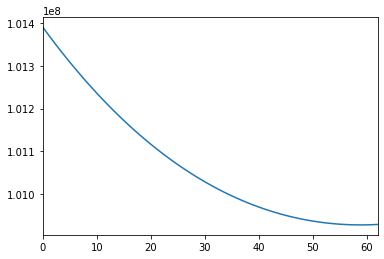

In [97]:
pd.Series(loss_vs_epoch).plot()
plt.show()
plt.close()

In [98]:
stu = oneHotStudent(df_post[99:100],pre=0)

skip.predict(x=np.array(stu.df_onehot),W1=W1,W2=W2)

array([0.00477535, 0.00456645, 0.00961867, 0.00755521, 0.00578143,
       0.01113478, 0.00703397, 0.00542365, 0.00923103, 0.00746958,
       0.0045718 , 0.0089134 , 0.00384777, 0.00663717, 0.00661544,
       0.00681631, 0.00440573, 0.00251424, 0.0035062 , 0.0060923 ,
       0.0082817 , 0.01002417, 0.007633  , 0.00542811, 0.00585463,
       0.01012246, 0.01578642, 0.0052777 , 0.00308193, 0.00489906,
       0.00452921, 0.01140978, 0.00397531, 0.00952275, 0.00377665,
       0.00621049, 0.01060975, 0.00872525, 0.00781261, 0.00408207,
       0.00418482, 0.0075148 , 0.00798281, 0.00554062, 0.00951114,
       0.01174437, 0.00588692, 0.00886989, 0.01066207, 0.00536562,
       0.00195732, 0.00301156, 0.00884743, 0.01296037, 0.00566996,
       0.00357004, 0.00294409, 0.00455558, 0.0116722 , 0.00508482,
       0.0048213 , 0.00617692, 0.00633724, 0.01131113, 0.00505084,
       0.00518195, 0.01784785, 0.00495692, 0.00450145, 0.00549007,
       0.00844836, 0.00397091, 0.00590878, 0.00710046, 0.00452

In [99]:
skip.predict(x=np.array(stu.df_onehot),W1=W1,W2=W2).max(), skip.predict(x=np.array(stu.df_onehot),W1=W1,W2=W2).min()

(0.017847853735501996, 0.0019573204781274433)

In [100]:
def visualize_weights(matrix, contrast = None, ret = False, title = None):
    if title is None:
        title = 'Weight Matrix Visualization'
        
    if contrast is not None:
        matrix -= np.mean(matrix)
        matrix = matrix / (contrast * (1 + np.abs(matrix / contrast)))

    max_size = np.max(np.abs(matrix))

    num_dims = matrix.shape[1]
    fig, ax = plt.subplots()
    fig.set_size_inches(h = 8, w = 16)
    fig.suptitle(title, fontsize = 24)
    fig.subplots_adjust(top = 0.93, bottom = 0.1)

    plot = ax.pcolormesh(matrix, cmap='PiYG', vmin=-max_size, vmax=max_size, snap=True)

    ax.set_xlabel('Dimension', fontsize = 20)
    ax.set_xticks(np.arange(0, num_dims + 1, 1))
    ax.set_xticks(np.arange(0.5, num_dims, 1), minor = True)
    ax.set_xticklabels([])
    ax.set_xticklabels(np.arange(1, 1 + num_dims), minor = True)

    ax.set_ylabel('Question', fontsize = 20)
    ax.set_yticks(np.linspace(0, 150, 31))
    ax.set_yticklabels([])
    ax.set_yticks(np.linspace(3, 147, 30), minor = True)
    ax.set_yticklabels(np.arange(1, 31), minor = True)

    ax.tick_params(axis = 'y', which = 'minor', length = 0, labelsize = 12)
    ax.tick_params(axis = 'x', which='minor', length=0, labelsize=12)

    ax.grid(axis='y', which='major', color='black',linewidth=0.5, linestyle='dashed')
    ax.grid(axis='x', which='major', color='black',linewidth=1)

    cbar = fig.colorbar(plot, ax = ax, pad = 0.01, extend = 'neither')
    cbar.ax.tick_params(labelsize=14)

    fig.canvas.set_window_title(title)

    if ret:
        return fig
        
    plt.show()

def visualize_weights_expanded(matrix, contrast=None, Q=30, title = None):
    if title is None:
        title = 'Weight Matrix Visualization'
    if contrast is not None:
        matrix -= np.mean(matrix)
        matrix = matrix / (contrast * (1 + np.abs(matrix / contrast)))

    max_size = np.max(np.abs(matrix))

    num_responses, num_dims = matrix.shape
    num_subcolumns = num_responses // Q
    expanded_matrix = (np.eye(num_subcolumns)[:, :, None] * matrix.reshape(Q, num_subcolumns, 1, num_dims)).transpose(0, 1, 3, 2).reshape(num_responses, num_subcolumns * num_dims)

    fig, ax = plt.subplots()
    fig.suptitle(title, fontsize=24)
    fig.subplots_adjust(top=0.93, bottom=0.1)

    plot = ax.pcolormesh(expanded_matrix, cmap='PiYG', vmin = -max_size, vmax = max_size, snap = True)

    ax.set_ylabel('Question', fontsize=20)

    ax.set_yticks(np.linspace(0, 150, 31))
    ax.set_yticklabels(np.arange(1, 31), verticalalignment = 'bottom')

    #ax.set_yticks(np.linspace(0, 180, 181), minor = True)
    #ax.set_yticklabels([], minor=True)

    ax.set_xlabel('Dimension', fontsize=20)

    ax.set_xticks(np.arange(0, num_subcolumns * num_dims + 1, num_subcolumns))
    ax.set_xticklabels(np.arange(1, 1 + num_dims), horizontalalignment = 'left')

    ax.set_xticks(np.arange(num_subcolumns * num_dims + 1), minor=True)
    ax.set_xticklabels([], minor=True)

    ax.tick_params(axis='y', which='major', length=3, labelsize=12)
    ax.tick_params(axis='x', which='major', length=6, labelsize=12)

    ax.grid(axis='y', which='major', color='black', linewidth=0.5, linestyle = 'dashed')
    ax.grid(axis='x', which='major', color = 'black', linewidth = 1)
    ax.grid(axis='x', which='minor', color='gray', linewidth=0.5, linestyle = 'dotted')

    cbar = fig.colorbar(plot, ax=ax, pad=0.01, extend='neither')
    cbar.ax.tick_params(labelsize=14)

    fig.canvas.set_window_title(title)
    plt.show()


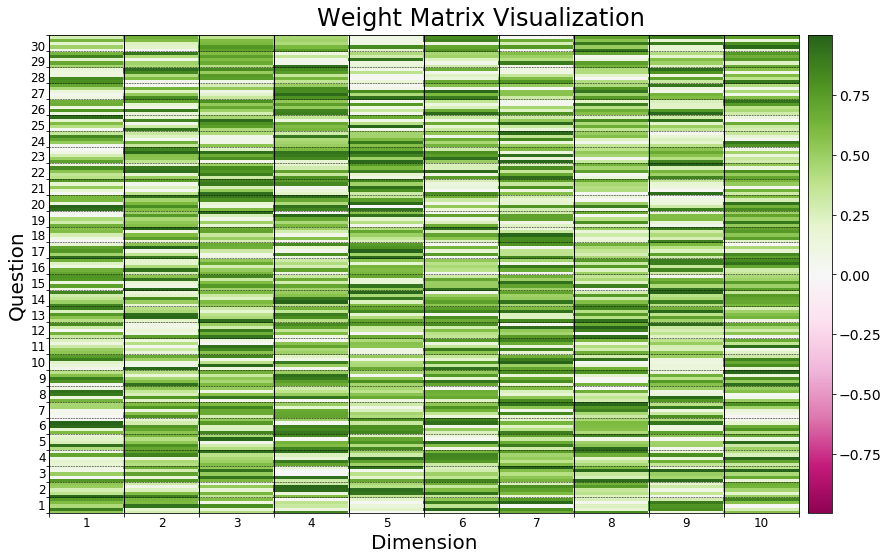

In [101]:
visualize_weights(W1)

In [102]:
# not working, dimension issues to be resolved

corpus2 = df_post[:10]

cbow = Thought2Vec(method="cbow", corpus=corpus2,
                window_size=1, n_hidden=10,
                n_epochs=30, learning_rate=0.001)
#W1_c, W2_c, loss_vs_epoch_c = cbow.run()